# Comparing accuracy metrics of Ensemble learning techniques with Deep learning techniques for market signalling strategy

* Method of approach = Applied research 
* Type of data to be used = Time Series data 
* Models selected for forecasting prices = RNN/LSTM/Ensemble learners

In [1]:
#Importing dependencies 
import pandas as pd
import sklearn as sk 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas_datareader as web
import datetime
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

In [2]:
plt.style.use('seaborn-whitegrid')

### What is the problem here?

* Forecasting has been done using regression methods using Support Vector Machines and Vector Auto Regression. In some cases, ARIMA was used to smooth out the forecast, but all of them were resulting in a huge MSE and error in predictions

* Usage of market sentiments were done by other researchers, but due to closed-source methods implemented, the methods cannot be used and the data will be insufficient for modelling

* Robo-advisory like methods were used to determine a Buy, Sell and Hold strategy based on Technical Indicators and OHLC using supervised learning methods as a classification problem, but such strategies were not used for forecasting future market prices 


##### Research Gap: Either a direct price forecasting was done using ARIMA based methods or Machine learning techniques, or a investment strategy was forecasted on the basis of stock's technical and OHLC statistics via classification algorithms, **BUT** both of them were not used together in a combined form to see how the forecasts would be affected if the model already had some data on BSH strategy 

### Research problem: Is there a model which can accurately predict the market signals of a given stock/index and help investors in decision making?

## Rule Based Approach

Some of the following rules I have decided will be implemented as follows:

* If(predictions == +ve) && (stock == 'bought'), **HOLD**
* If(predictions == -ve) && (stock == 'not bought'), **NEUTRALITY**
* If(predictions == +ve) && (stock == 'not bought'), **BUY**
* If(predictions == -ve) && (stock == 'bought'), **SELL**

Stock buying (Whether it is bought or not) will have to be cross-fetched using :

1. Change in Volume = (Today's Volume) - (Yesterday's Volume) / (Yesterday's Volume)

2. Elder Force Index 
3. Accumulation/Distribution Line 


Rate of change in stock price will help to add a new feature to determine a shift in trend using:

*Change in Stock Price = (Today's ADJCLOSE) - (Yesterday's ADJCLOSE) / (Yesterday's ADJCLOSE)*



## What all features shall be used as input data?

* Opening, Adj Close and Volume
* Technical Indicator data 
* Change in Volume
* Change in Price 
* _Predictors of Interest: Future Adj Close & BSH Strategy_

## Importing SPY data

In [34]:
df = web.DataReader('SPY', 'yahoo', start='1998-01-30', end='2018-12-24')

Text(0.5, 1.0, 'SPY Close and Adj.Close')

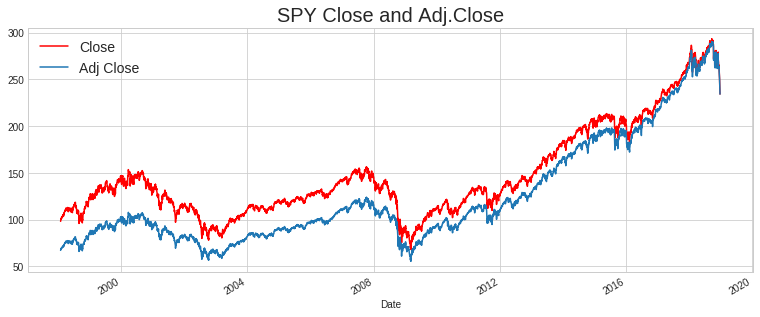

In [6]:
df['Close'].plot(figsize=(13,5), color='red')
df['Adj Close'].plot()
plt.legend(fontsize=14)
plt.title('SPY Close and Adj.Close', fontsize=20)
#plt.savefig('close.png', dpi=400)

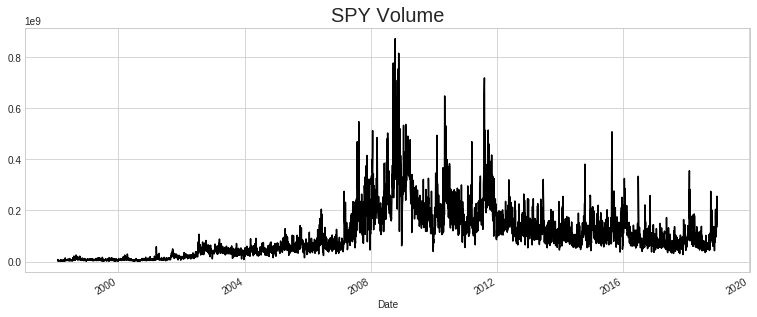

In [73]:
df['Volume'].plot(figsize=(13,5), color='black')
plt.title('SPY Volume', fontsize=20)
plt.savefig('volume.png', dpi=400)

In [7]:
df['detrend'] = df['Adj Close'] - df['Adj Close'].shift(1)

In [72]:
df['detrend'][4000:4252].plot(figsize=(7,7), color='blue')
plt.title('Stationarity Differencing', fontsize=20)
#plt.savefig('differencing.png', dpi=500)

KeyError: 'detrend'

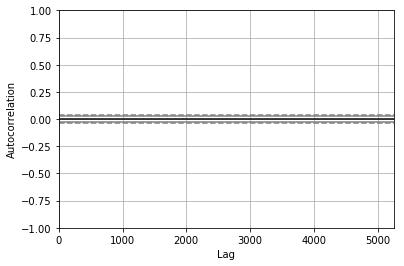

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['detrend'])

In [14]:
df['returns'] = df['Adj Close'].div(df['Adj Close'].shift())

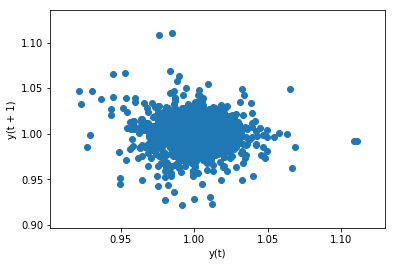

In [19]:
lag_plot(df['returns'])

In [9]:


from pandas import Series
from statsmodels.tsa.stattools import adfuller
X = df['Adj Close'][4000:4252]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
1
2
3
4
5
6
7
8
9
10
from pandas import Series
from statsmodels.tsa.stattools import adfuller

ADF Statistic: -1.278494
p-value: 0.638953
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


Text(0.5,1,'Lag Plot')

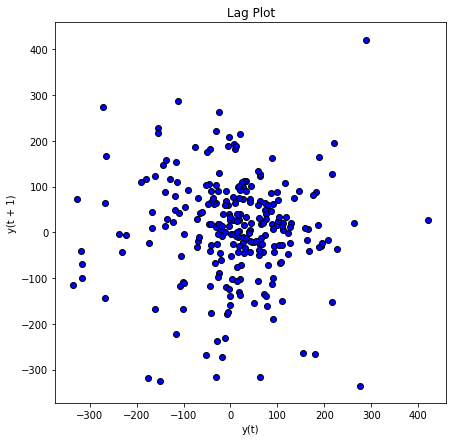

In [18]:
from pandas.plotting import lag_plot
plt.figure(figsize=(7,7))
lag_plot(df['detrend'][4000:4252], edgecolor='black', c='blue')
plt.title('Lag Plot')
#plt.savefig('Lag.png', dpi=500)

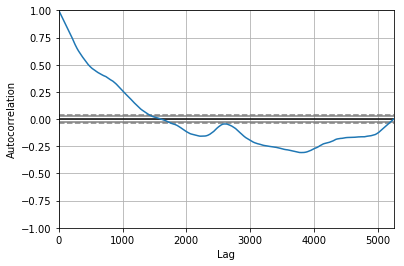

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Adj Close'])

In [11]:
from pandas.plotting import autocorrelation_plot

In [4]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1998-01-29,99.562500,97.562500,97.843697,98.250000,8007700.0,67.215103
1998-01-30,98.968697,98.000000,98.781197,98.312500,3649100.0,67.257866
1998-02-02,100.500000,99.750000,99.906197,99.937500,5756300.0,68.369568
1998-02-03,100.812500,99.718697,100.000000,100.687500,2759600.0,68.882652
1998-02-04,101.156197,99.937500,100.281197,100.562500,3374000.0,68.797134
1998-02-05,101.593697,100.031197,101.312500,100.500000,5076200.0,68.754379
1998-02-06,101.625000,100.687500,101.000000,101.625000,5701200.0,69.524017
1998-02-09,101.750000,100.718697,101.718697,101.281197,2322200.0,69.288826
1998-02-10,102.468697,101.187500,101.437500,102.250000,3660400.0,69.951599


In [137]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1998-01-29,99.562500,97.562500,97.843697,98.250000,8007700.0,67.607613
1998-01-30,98.968697,98.000000,98.781197,98.312500,3649100.0,67.650620
1998-02-02,100.500000,99.750000,99.906197,99.937500,5756300.0,68.768814
1998-02-03,100.812500,99.718697,100.000000,100.687500,2759600.0,69.284866
1998-02-04,101.156197,99.937500,100.281197,100.562500,3374000.0,69.198875
1998-02-05,101.593697,100.031197,101.312500,100.500000,5076200.0,69.155876
1998-02-06,101.625000,100.687500,101.000000,101.625000,5701200.0,69.930000
1998-02-09,101.750000,100.718697,101.718697,101.281197,2322200.0,69.693420
1998-02-10,102.468697,101.187500,101.437500,102.250000,3660400.0,70.360077


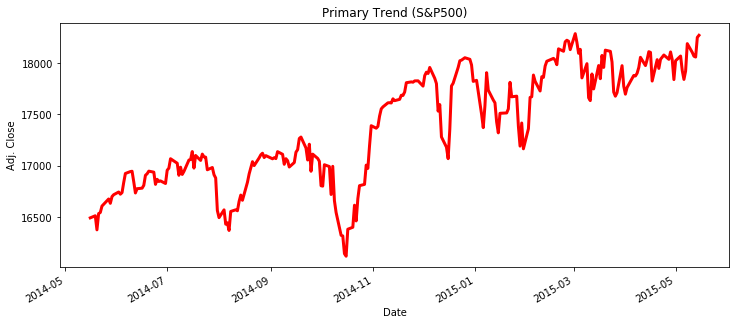

In [22]:
plt.subplot(1, 1, 1)
df['Adj Close'][4100:4352].plot(figsize=(12,5), color='red', linewidth=3.0)
plt.title('Primary Trend (S&P500)')
plt.ylabel('Adj. Close')
plt.savefig('primary.png', dpi=400)

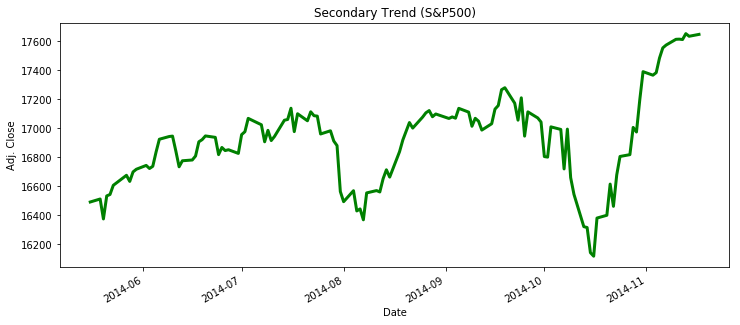

In [23]:
df['Adj Close'][4100:4229].plot(figsize=(12,5), color='green', linewidth=3.0)
plt.title('Secondary Trend (S&P500)')
plt.ylabel('Adj. Close')
plt.savefig('secondary.png', dpi=400)

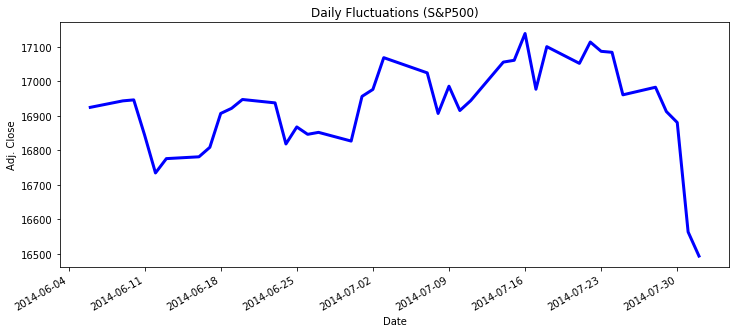

In [24]:
df['Adj Close'].iloc[4114:4154].plot(figsize=(12, 5), color='blue', linewidth=3.0)
plt.title('Daily Fluctuations (S&P500)')
plt.ylabel('Adj. Close')
plt.savefig('fluctuations.png', dpi=400)

## Technical Indicator data from AlphaVantage, preprocessing for plots

In [330]:
plt.rcParams.update({'font.size': 14})

In [192]:
#Class object to take the dataframe from the alphavantage API and convert it into a valid dataframe with float types

class Preprocessor:
    
    def __init__(self, df):
        self.df = df
     
    #Take the dictionary and convert it into a clean looking dataframe
    def df_creator(self, sort_index=True):
        self.df = pd.DataFrame(self.df)
        self.df = self.df.T
        self.df.index = pd.to_datetime(self.df.index)
        self.df = self.df.sort_index()
        return self.df
    #Scan through the dtypes of each column and convert it to appropriate dtype for preprocessing 
    def dtype_editor(self, dataframe):
        for cols in dataframe.columns.values:
            dataframe[cols] = dataframe[cols].astype('float64')
        return dataframe
    
    #Slice dataframe for plotting
    def slicer(self, dataframe):
        sliced_df = dataframe[3985:4085]
        return sliced_df

In [27]:
#Extract all technical indicators data from alphavantage
ti = TechIndicators(key='4MI00I6LJ8Y6T2CH')
ts = TimeSeries(key='4MI00I6LJ8Y6T2CH')
stock, meta_stock = ti.get_macd(symbol='SPY')

### MACD Plot

In [184]:
ppr = Preprocessor(stock)
macd_df = ppr.df_creator()
macd_df = ppr.dtype_editor(macd_df)

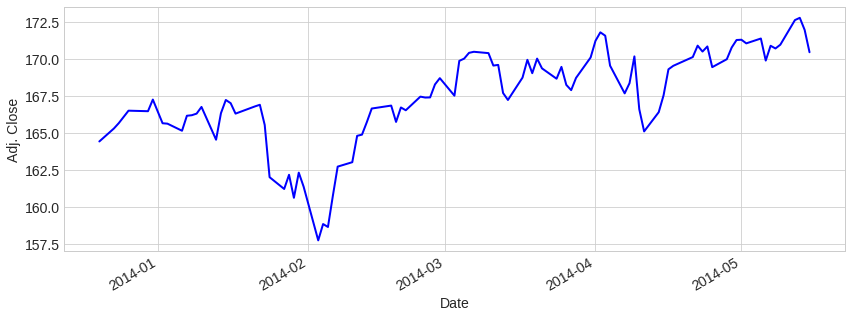

In [331]:
df[4000:4100]['Adj Close'].plot(figsize=(14,5), color='blue', linewidth=2.0)
plt.ylabel('Adj. Close')
plt.savefig('default.png', dpi=400)

In [289]:
df[4000:4100]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-20,181.990005,180.570007,180.690002,181.559998,197087000.0,164.431198
2013-12-23,182.639999,182.070007,182.449997,182.529999,85598000.0,165.309662
2013-12-24,183.009995,182.529999,182.539993,182.929993,45368800.0,165.671967
2013-12-26,183.960007,183.320007,183.339996,183.860001,63365000.0,166.514191
2013-12-27,184.179993,183.660004,184.100006,183.850006,61814000.0,166.505112
2013-12-30,184.020004,183.580002,183.869995,183.820007,56857000.0,166.477966
2013-12-31,184.690002,183.929993,184.070007,184.690002,86119900.0,167.265900
2014-01-02,184.070007,182.479996,183.979996,182.919998,119636900.0,165.662872
2014-01-03,183.600006,182.630005,183.229996,182.889999,81390600.0,165.635696


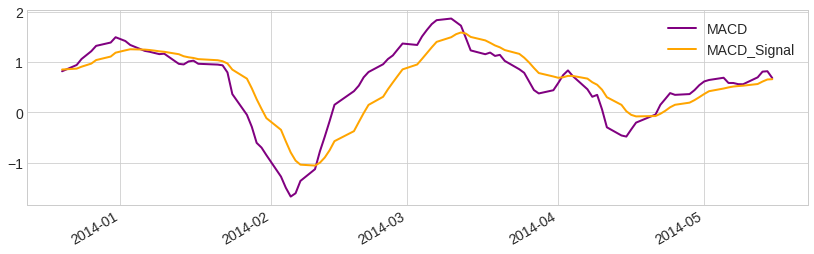

In [332]:
macd_df[3985:4085]['MACD'].plot(figsize=(14, 4), color='purple', linewidth=2.0)
macd_df[3985:4085]['MACD_Signal'].plot(figsize=(14, 4), color='orange', linewidth=2.0)
plt.legend()
plt.savefig('macd.png', dpi=400)

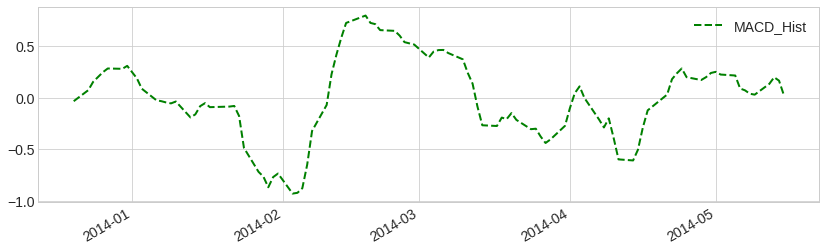

In [333]:
macd_df[3985:4085]['MACD_Hist'].plot(figsize=(14, 4), color='green', linewidth=2.0, style='--')
plt.legend()
plt.savefig('macd_hist.png', dpi=400)

### Stochastic Oscillator plot

In [225]:
stock2, meta_stock2 = ti.get_stoch(symbol='SPY')

In [226]:
ppr = Preprocessor(stock2)
sto_df = ppr.df_creator()
sto_df = ppr.dtype_editor(sto_df)

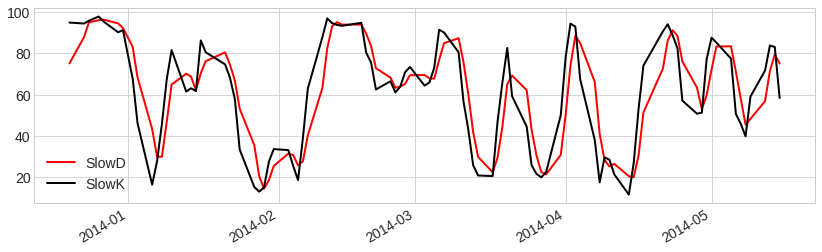

In [334]:
sto_df[4010:4110]['SlowD'].plot(figsize=(14, 4), color='red', linewidth=2.0)
sto_df[4010:4110]['SlowK'].plot(figsize=(14, 4), color='black', linewidth=2.0)
plt.legend()
plt.savefig('stochastic.png', dpi=400)

### CCI plot

In [250]:
stock3, meta_stock3 = ti.get_cci(symbol='SPY')

In [251]:
ppr = Preprocessor(stock3)
cci_df = ppr.df_creator()
cci_df = ppr.dtype_editor(cci_df)

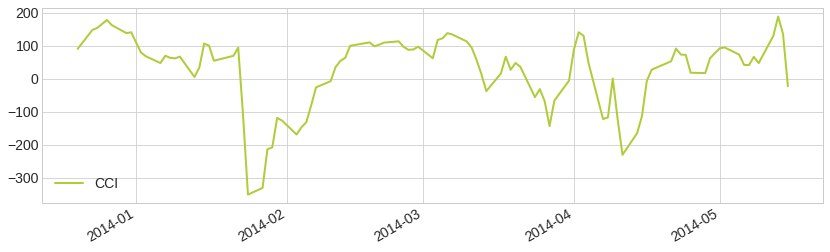

In [335]:
cci_df[3999:4099].plot(figsize=(14, 4), color='#AECD39', linewidth=2.0)
plt.savefig('cci.png', dpi=400)

### OBV plot

In [264]:
stock4, meta_stock4 = ti.get_obv(symbol='SPY')

In [265]:
ppr = Preprocessor(stock4)
obv_df = ppr.df_creator()
obv_df = ppr.dtype_editor(obv_df)

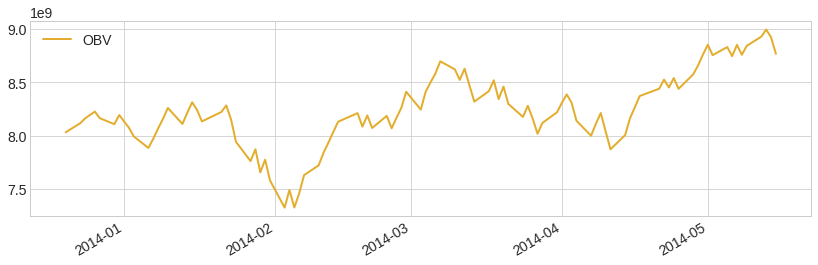

In [336]:
obv_df[4018:4118].plot(figsize=(14, 4), color='#E3AE2E', linewidth=2.0)
plt.savefig('obv.png')

### Bollinger Bands plot

In [338]:
stock5, meta_stock5 = ti.get_bbands(symbol='SPY')

In [339]:
ppr = Preprocessor(stock5)
bbands_df = ppr.df_creator()
bbands_df = ppr.dtype_editor(bbands_df)

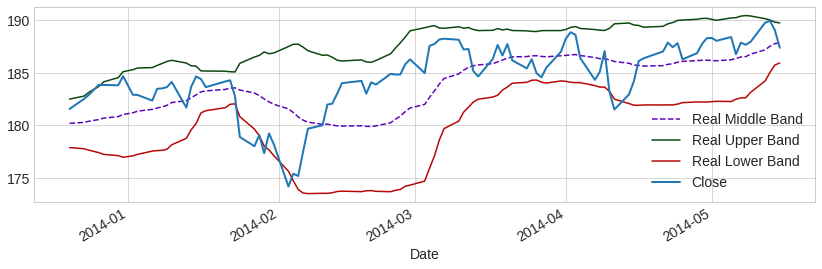

In [348]:
bbands_df[3999:4099]['Real Middle Band'].plot(figsize=(14, 4), color='#5A05B9', style='--')
bbands_df[3999:4099]['Real Upper Band'].plot(figsize=(14, 4), color='#0B460E', linewidth=1.5)
bbands_df[3999:4099]['Real Lower Band'].plot(figsize=(14, 4), color='#B90505', linewidth=1.5)
df[4000:4100]['Close'].plot(figsize=(14, 4), linewidth=2.0)
plt.legend()
plt.savefig('bbands.png', dpi=400)

### Aroon indicator plot

In [308]:
stock6, meta_stock6 = ti.get_aroon(symbol='SPY')

In [313]:
ppr = Preprocessor(stock6)
aroon_df = ppr.df_creator()
aroon_df = ppr.dtype_editor(aroon_df)

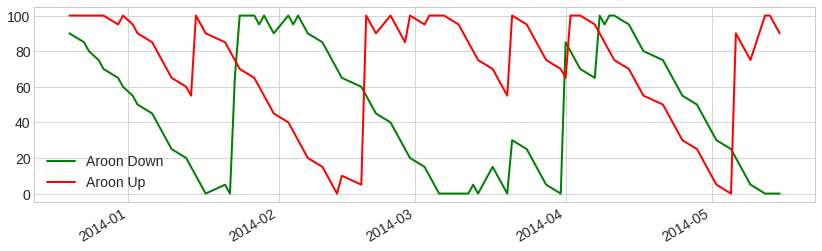

In [341]:
aroon_df[3998:4098]['Aroon Down'].plot(figsize=(14, 4), linewidth=2.0, color='g')
aroon_df[3998:4098]['Aroon Up'].plot(figsize=(14, 4), linewidth=2.0, color='r')
plt.legend()
plt.savefig('aroon.png', dpi=400)

## Descriptive Statistics

2754 data point have been extracted from 1/1/2008 to 7/12/2018

In [83]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5250.000000,5250.000000,5250.000000,5250.000000,5.250000e+03,5250.000000
mean,148.506680,146.656167,147.635202,147.623246,1.043249e+08,125.082954
std,49.149134,49.081775,49.127717,49.125228,1.007270e+08,56.520024
min,70.000000,67.099998,67.949997,68.110001,1.436600e+06,55.859394
25%,114.564375,113.012501,113.859999,113.779999,3.496242e+07,86.070812
50%,132.908104,131.096855,132.089996,132.035599,7.559675e+07,101.969543
75%,170.070004,168.919994,169.567501,169.522499,1.460692e+08,153.242977
max,293.940002,291.809998,293.089996,293.579987,8.710263e+08,292.256989


## Plots of the dataset features

In [10]:
plt.style.use('seaborn-ticks')

In [16]:
print(plt.style.available)

['seaborn-white', 'seaborn', 'seaborn-ticks', 'seaborn-whitegrid', 'seaborn-colorblind', 'seaborn-poster', 'seaborn-bright', 'seaborn-dark-palette', 'dark_background', 'seaborn-muted', 'classic', 'bmh', 'seaborn-talk', 'ggplot', 'seaborn-dark', 'seaborn-notebook', 'tableau-colorblind10', 'seaborn-pastel', 'fivethirtyeight', 'seaborn-paper', 'seaborn-darkgrid', '_classic_test', 'seaborn-deep', 'fast', 'grayscale', 'Solarize_Light2']


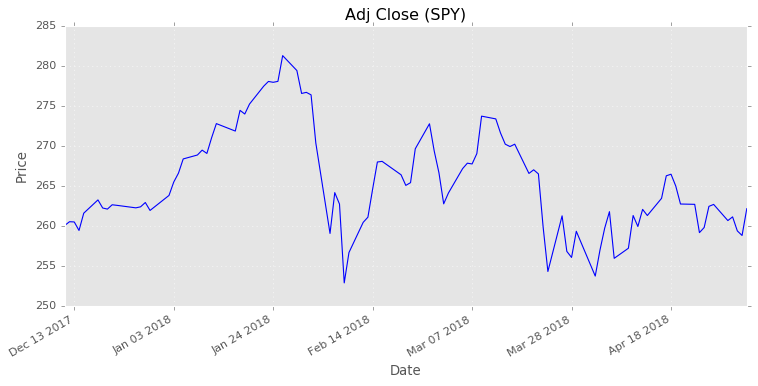

In [70]:
df['Adj Close'][5000:5100].plot(figsize=(11,5), color='b')
plt.title('Adj Close (SPY)')
plt.ylabel('Price')
plt.grid(linestyle=':')
#plt.savefig('adjclose.png', dpi=500)

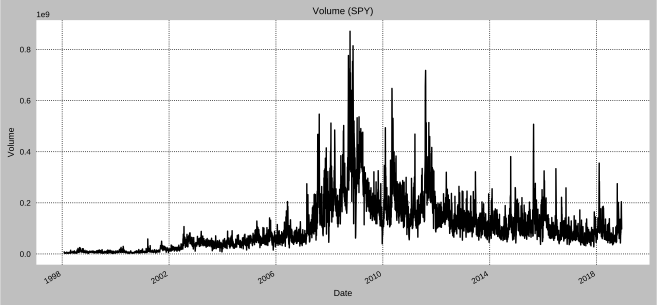

In [48]:
df['Volume'].plot(figsize=(11,5))
plt.title('Volume (SPY)')
plt.ylabel('Volume')
plt.grid(linestyle=':')
plt.savefig('volume.png', dpi=1000)

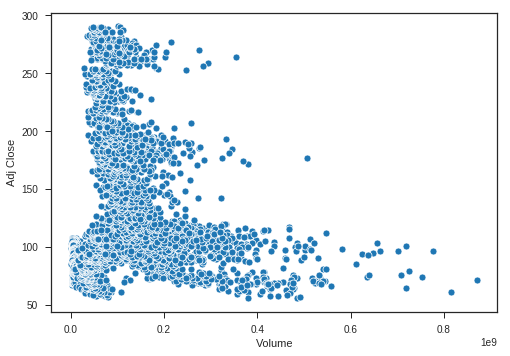

In [28]:
sns.scatterplot(df['Volume'], df['Adj Close'])

## Technical Indicators to be used for the dataset

# 1. Moving Average (EMA)

10-day MA and 50-day MA will be used as two crossovers for a signalling of either a uprise or a downfall

* if 5 day EMA crosses above 20 day EMA, **Bullish trend begins, hence Buy**
* if 5 day EMA crosses below 20 day EMA, **Bearish trend begins, hence Sell**
* else **Hold**

Mathematical interpretation 

* if %Change in 5 day EMA is negative with rate of change >= -0.45% **and** both 5D-EMA and 20D-EMA are negative = **Sell**

* if %Change in 5 day EMA is positive with rate of change >= 0.45% **and** both 5D-EMA and 20D-EMA are positive = **Buy**

* else **Hold**

In [48]:
#Two new columns, 10-DayMA and 50-DayMA
df['5-DayMA'] = df['Adj Close'].rolling(window=5).mean()
df['20-DayMA'] = df['Adj Close'].rolling(window=20).mean()

In [94]:
df['21-DayEMA'] = df['Close'].rolling(window=21).mean()

### Exponential Moving Average Plot

In [49]:
#Exponential moving average calculation
df['5-DayEMA'] = df['Adj Close'].ewm(span=5).mean()
df['20-DayEMA'] = df['Adj Close'].ewm(span=20).mean()

In [87]:
#Column of percentage change between 5DayEMA and 20
df['20-DayEMAPct'] = df['20-DayEMA'].pct_change()*100

In [88]:
df['5-DayEMAPct'] = df['5-DayEMA'].pct_change() * 100

In [59]:
df.iloc[4999]

High         2.655200e+02
Low          2.640300e+02
Open         2.651600e+02
Close        2.655100e+02
Volume       7.656390e+07
Adj Close    2.592356e+02
5-DayMA      2.577906e+02
20-DayMA     2.548766e+02
9-DayEMA     2.579901e+02
14-DayEMA    2.554961e+02
5-DayEMA     2.579901e+02
20-DayEMA    2.554961e+02
Name: 2017-12-08 00:00:00, dtype: float64

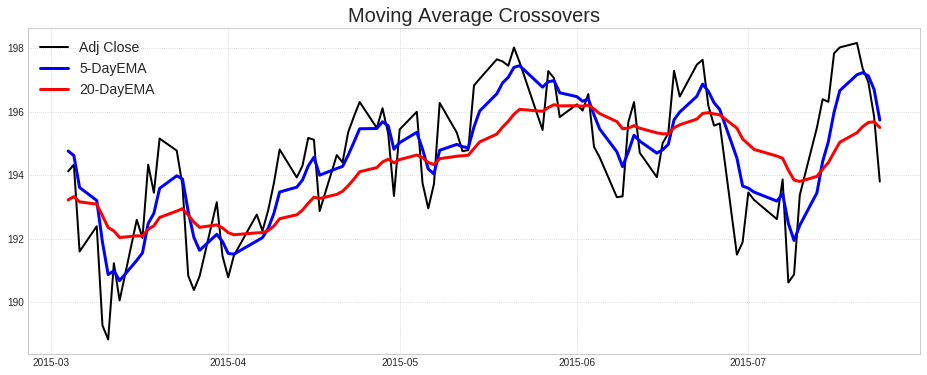

In [71]:
plt.figure(figsize=(16,6))
plt.plot(df['Adj Close'][4300:4400], linewidth=2.0, c='black')
plt.plot(df['5-DayEMA'][4300:4400], c='blue', linewidth=3.0)
plt.plot(df['20-DayEMA'][4300:4400],c='red' ,linewidth=3.0);plt.legend()
plt.title('Moving Average Crossovers', fontsize=20)
plt.legend(fontsize=14)
plt.grid(linestyle=':')
plt.savefig('ema.png', dpi=400)

# 2. Stochastic Oscillator 

In [18]:
stochastic, meta_stochastic = ti.get_stoch(symbol='SPY')

In [30]:
stochastic = stochastic.sort_index()

In [31]:
lolz = pd.concat([df,stochastic], axis=1, sort=False, join='outer')

In [33]:
lolz[150:160]

,High,Low,Open,Close,Volume,Adj Close,SlowD,SlowK
1998-08-19,111.093697,109.625000,111.093697,110.093697,6258600.0,75.774414,60.8826,82.3344
1998-08-20,110.406197,109.156197,109.687500,109.437500,7402800.0,75.322784,75.0158,82.7403
1998-08-21,108.718697,105.500000,108.187500,108.562500,16685400.0,74.720520,78.0542,69.0879
1998-08-24,109.937500,108.312500,109.250000,109.250000,7201700.0,75.193703,71.9628,64.0602
1998-08-25,111.250000,108.640602,110.375000,109.500000,9688300.0,75.365776,65.6443,63.7847
1998-08-26,109.625000,107.750000,108.281197,108.875000,9339700.0,74.935631,64.3150,65.1002
1998-08-27,107.562500,103.468697,107.000000,103.750000,24887800.0,71.408226,57.6145,43.9587
1998-08-28,105.718697,102.156197,104.968697,103.375000,23735900.0,71.150124,44.7655,25.2378
1998-08-31,104.015602,95.000000,103.750000,96.000000,22563100.0,66.074112,25.6401,7.7238
1998-09-01,100.562500,93.625000,96.062500,100.062500,24748500.0,68.870216,17.6306,19.9303


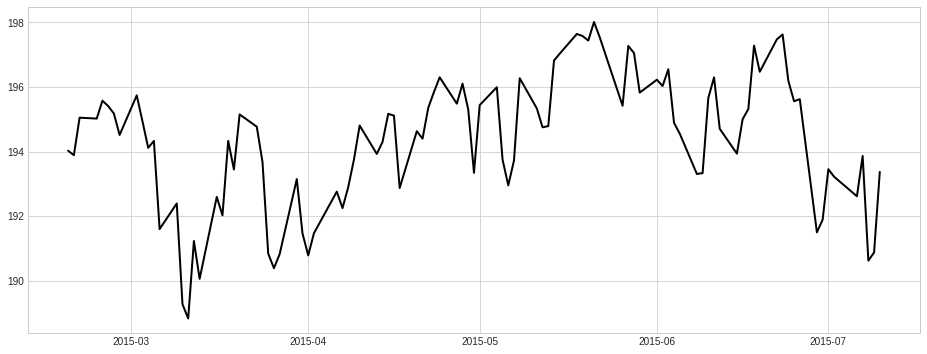

In [41]:
plt.figure(figsize=(16, 6))
plt.plot(lolz['Adj Close'][4300:4400], linewidth=2.0, color='black')

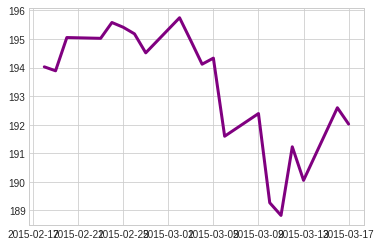

In [40]:
plt.plot(lolz['Adj Close'][4300:4320], linewidth=3.0, color='purple')

In [120]:
bbands = bbands.sort_index()

In [21]:
stock3, meta_stock3 = ti.get_macd(symbol='SPY')

NameError: name 'ti' is not defined

In [142]:
macd = pd.DataFrame(stock3)
macd = macd.astype(float).T

In [143]:
macd.to_csv('macd.csv')

<Figure size 792x360 with 0 Axes>

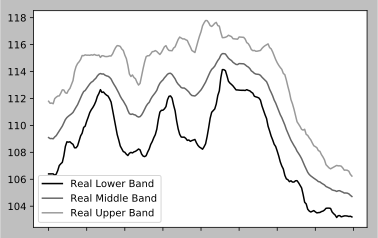

In [17]:
plt.figure(figsize=(11,5))
bbands[3600:3800].plot()

In [19]:
df.to_csv('spy.csv')

Text(0.5,1,'Stochastic Oscillator')

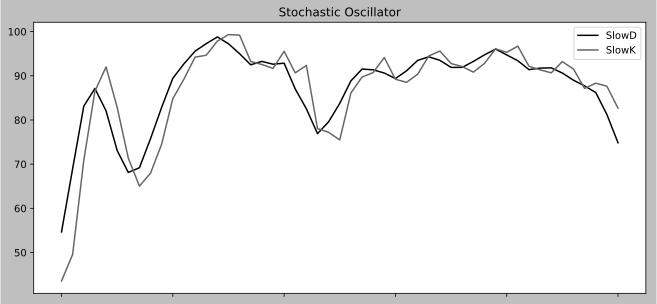

In [59]:
stochastic[5200:].plot(figsize=(11,5))
plt.title("Stochastic Oscillator")

## Index data of interest: SPY


Text(0.5,1,'Adj.Close Histogram')

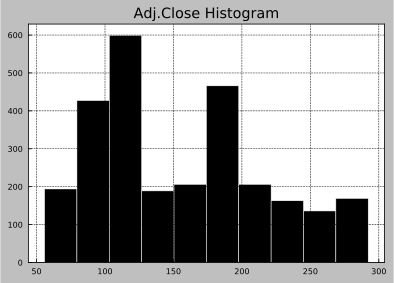

In [47]:
#Histogram of adjusted close prices
plt.hist(df['Adj Close'], edgecolor='white')
plt.title("Adj.Close Histogram")

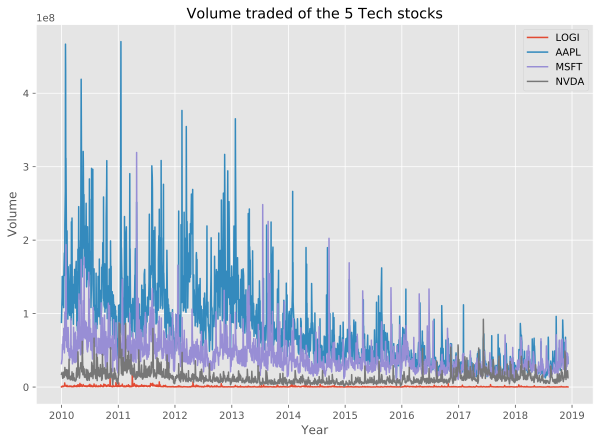

In [6]:
plt.figure(figsize=(10,7))
plt.plot(df_stocks_features['Date'], df_stocks_features['Volume']['LOGI'])
plt.plot(df_stocks_features['Date'], df_stocks_features['Volume']['AAPL'])
#plt.plot(df_stocks_features['Date'],df_stocks_features['Volume']['AMZN'])
plt.plot(df_stocks_features['Date'],df_stocks_features['Volume']['MSFT'])
plt.plot(df_stocks_features['Date'],df_stocks_features['Volume']['NVDA'])
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Volume traded of the 5 Tech stocks')
plt.legend()

In [7]:
#Let's plot all the stock data from 2015 to 2018
df_stocks_2015 = df_stocks_features[1259:]
df_stocks_2015 = df_stocks_2015.reset_index()

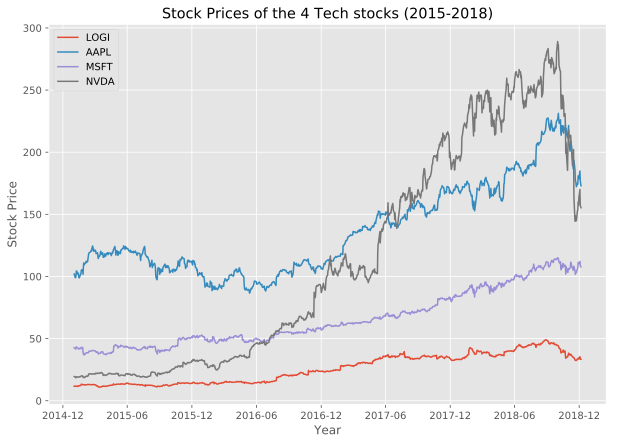

In [11]:
plt.figure(figsize=(10,7))
plt.plot(df_stocks_2015['Date'], df_stocks_2015['Adj Close']['LOGI'])
plt.plot(df_stocks_2015['Date'], df_stocks_2015['Adj Close']['AAPL'])
#plt.plot(df_stocks_features['Date'],df_stocks_features['Adj Close']['AMZN'])
plt.plot(df_stocks_2015['Date'],df_stocks_2015['Adj Close']['MSFT'])
plt.plot(df_stocks_2015['Date'],df_stocks_2015['Adj Close']['NVDA'])
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('Stock Prices of the 4 Tech stocks (2015-2018)')
plt.legend()

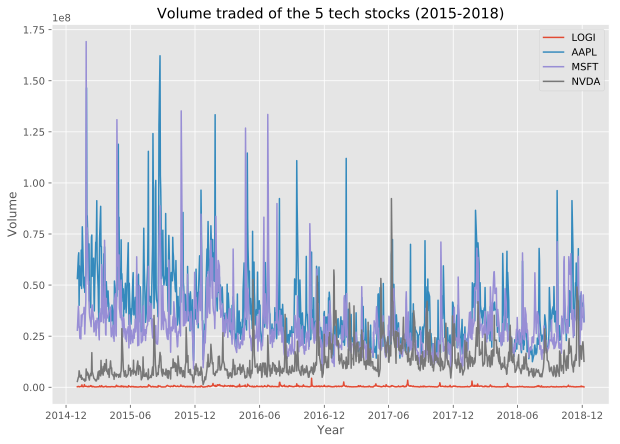

In [9]:
plt.figure(figsize=(10,7))
plt.plot(df_stocks_2015['Date'], df_stocks_2015['Volume']['LOGI'])
plt.plot(df_stocks_2015['Date'], df_stocks_2015['Volume']['AAPL'])
#plt.plot(df_stocks_features['Date'],df_stocks_features['Adj Close']['AMZN'])
plt.plot(df_stocks_2015['Date'],df_stocks_2015['Volume']['MSFT'])
plt.plot(df_stocks_2015['Date'],df_stocks_2015['Volume']['NVDA'])
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Volume traded of the 5 tech stocks (2015-2018)')
plt.legend()

## Basic Statistics of Finance

Text(0,0.5,'Percent Change in stock price')

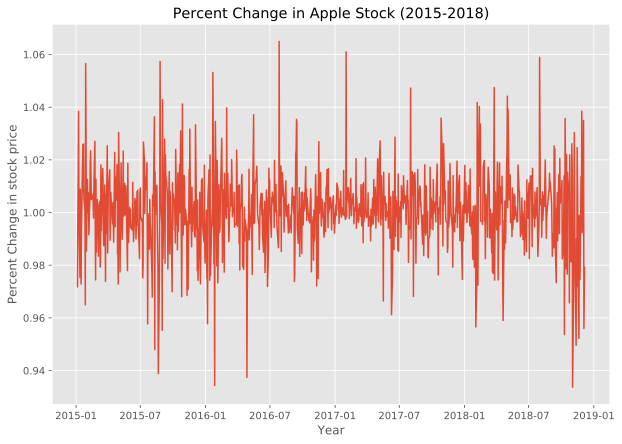

In [10]:
#Finding net percent change in stock price
plt.figure(figsize=(10,7))
df_stocks_2015['Change_AAPL'] = df_stocks_2015['Adj Close']['AAPL'].div(df_stocks_2015['Adj Close']['AAPL'].shift())
plt.plot(df_stocks_2015['Date'], df_stocks_2015['Change_AAPL'])
plt.title('Percent Change in Apple Stock (2015-2018)')
plt.xlabel('Year')
plt.ylabel('Percent Change in stock price')

## Stock Autocorrelation

Autocorrelation will act as a statistical proof that stock prices are usually temporal in nature and perhaps using a model which learns using temporal sequencing might be a good choice also.

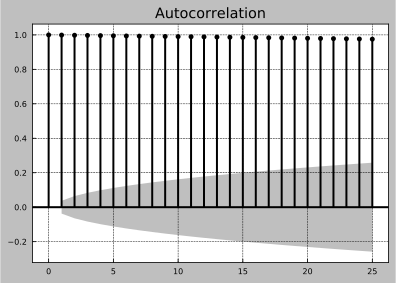

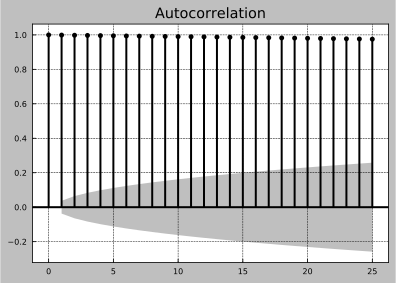

In [49]:
plot_acf(df['Adj Close'], lags=25)

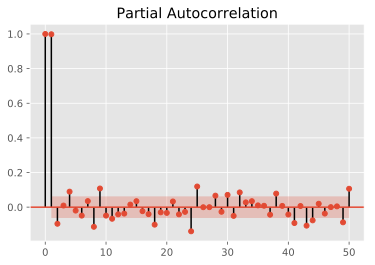

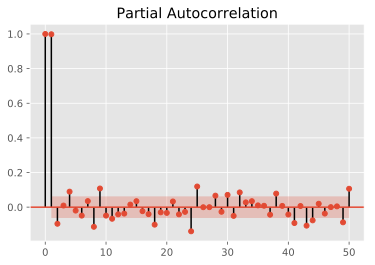

In [23]:
plot_pacf(df_stocks_2015['Adj Close']['AAPL'], lags=50)